In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
df=pd.DataFrame(iris.data,columns=['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width'])

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


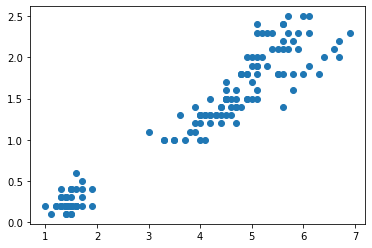

In [5]:
plt.scatter(df.petal_length,df.petal_width)

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(df[['petal_length']])
df.petal_length=scaler.transform(df[['petal_length']])

scaler.fit(df[['petal_width']])
df.petal_width=scaler.transform(df[['petal_width']])

df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667
...,...,...,...,...
145,6.7,3.0,0.711864,0.916667
146,6.3,2.5,0.677966,0.750000
147,6.5,3.0,0.711864,0.791667
148,6.2,3.4,0.745763,0.916667


In [25]:
km=KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
y_predicted=km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
df['clusters']=y_predicted
df

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,0.067797,0.041667,0
1,4.9,3.0,0.067797,0.041667,0
2,4.7,3.2,0.050847,0.041667,0
3,4.6,3.1,0.084746,0.041667,0
4,5.0,3.6,0.067797,0.041667,0
...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,1
146,6.3,2.5,0.677966,0.750000,1
147,6.5,3.0,0.711864,0.791667,1
148,6.2,3.4,0.745763,0.916667,1


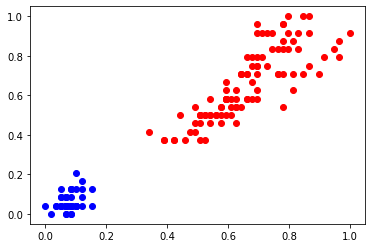

In [28]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
plt.scatter(df1.petal_length,df1.petal_width,color='blue')
plt.scatter(df2.petal_length,df2.petal_width,color='red')
plt.show()

In [29]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    sse.append(km.inertia_)

In [30]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667126,
 0.8535683225340073,
 0.6800800986587507,
 0.5656776810037092,
 0.48580845539143697,
 0.41363725779406146]

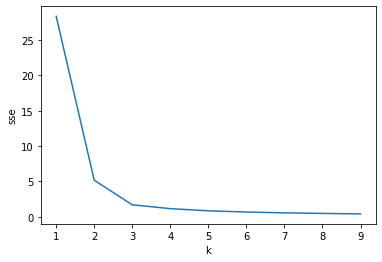

In [31]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_rng,sse)